In this noteboook, we train RetinaNet model on the training data.<br>
Keras-retinanet github repo is used for training and prediction.

In [ ]:
import pandas as pd
# show images inline
%matplotlib inline

import keras
import tensorflow

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

import tensorflow as tf

Cloning the repo and building the environment

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git
%cd keras-retinanet/
!python setup.py build_ext --inplace

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 6220 (delta 5), reused 6 (delta 2), pack-reused 6205
Receiving objects: 100% (6220/6220), 13.48 MiB | 30.67 MiB/s, done.
Resolving deltas: 100% (4205/4205), done.
/content/keras-retinanet
running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/ker

In [ ]:

from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet import models

Installing the keras-retinanet library and downloading the pretrained model

In [ ]:
!pip install --upgrade git+https://github.com/broadinstitute/keras-resnet
import keras
import keras_resnet
import urllib.request
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'
#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)
print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/broadinstitute/keras-resnet to /tmp/pip-req-build-2gjqkwwd
  Running command git clone -q https://github.com/broadinstitute/keras-resnet /tmp/pip-req-build-2gjqkwwd
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=22164 sha256=ff306eb74bcd60b49ba1facfb7046c15bb886a2737a78c4b59ded3dd1c0f36c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-p66l2m7p/wheels/f8/b9/f8/64a22c5e939a33ab49bffa0c96b23be2e66f84693b17ff512b
Successfully built keras-resnet
Downloaded pretrained model to ./snapshots/_pretrained_model.h5


Loading class & label data

In [ ]:
classes=pd.read_csv("/content/drive/MyDrive/RetinaNet/classes.csv", header=None)
classes

,0,1
0,Ignore,0
1,Pedestrian,1
2,People,2
3,Bicycle,3
4,Car,4
5,Van,5
6,Truck,6
7,Tricycle,7
8,Awning-tricycle,8
9,Bus,9


Loading file path and annotation data

In [ ]:
annotation = pd.read_csv("/content/drive/MyDrive/RetinaNet/annotation.csv",header=None, names = ['filename','xmin','ymin','xmax', 'ymax','class'])
annotation

,filename,xmin,ymin,xmax,ymax,class
0,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,884,952,968,1042,Car
1,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,175,945,243,1050,Car
2,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,254,889,311,997,Car
3,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,193,852,267,917,Tricycle
4,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,175,803,255,892,Van
...,...,...,...,...,...,...
353542,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,426,83,435,90,Car
353543,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,430,86,439,93,Car
353544,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,434,88,444,96,Car
353545,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,459,57,465,64,Ignore


Training the model with the following parameters:
1. Backbone: Resnet-50
2. Batch size: 4
3. Steps: 500
4. Epochs: 25

In [ ]:
#!/content/keras-retinanet/keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 4 --steps 500 --epochs 25 csv /content/drive/MyDrive/RetinaNet/annotation.csv /content/drive/MyDrive/RetinaNet/classes.csv

Creating model, this may take a second...
2022-10-29 11:46:50.780033: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)           

Loading the model saved after the latest epoch

In [ ]:
model_path = os.path.join('/content/drive/MyDrive/RetinaNet/snapshots', sorted(os.listdir('/content/drive/MyDrive/RetinaNet/snapshots'), reverse=True)[0])
#print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')  ## Use backbone as resnet50
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pd.read_csv('/content/drive/MyDrive/RetinaNet/classes.csv',header=None).T.loc[0].to_dict()

Checking the predictions of the newly trained model and comparing with the actual annotations

In [ ]:
THRES_SCORE = 0.3  # Set Score Threshold Value

def df_plot_orinal(drawOG,img_path,df):
    df=df[df['filename']==img_path]
    for i,r in df.iterrows():
        cv2.rectangle(drawOG, (r['xmin'], r['ymin']), (r['xmax'], r['ymax']), (255,0,0),2)

def img_inference(img_path):
  image = read_image_bgr(img_path)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
  drawOG = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  df_plot_orinal(drawOG,img_path,annotation)
  # correct for image scale
  boxes /= scale
  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      #print(score)
      if score < THRES_SCORE:
          continue
      color = label_color(label)
      b = box.astype(int)
      draw_box(draw, b, color=color)
      caption = "{} {:.3f}%".format(labels_to_names[label], score*100)

  fig = plt.figure(figsize=(20, 20))
  ax1=fig.add_subplot(1, 2, 1)
  plt.imshow(draw)
  ax2=fig.add_subplot(1, 2, 2)
  plt.imshow(drawOG)

  ax1.title.set_text('Predicted')
  ax2.title.set_text('Actual')
  plt.show()

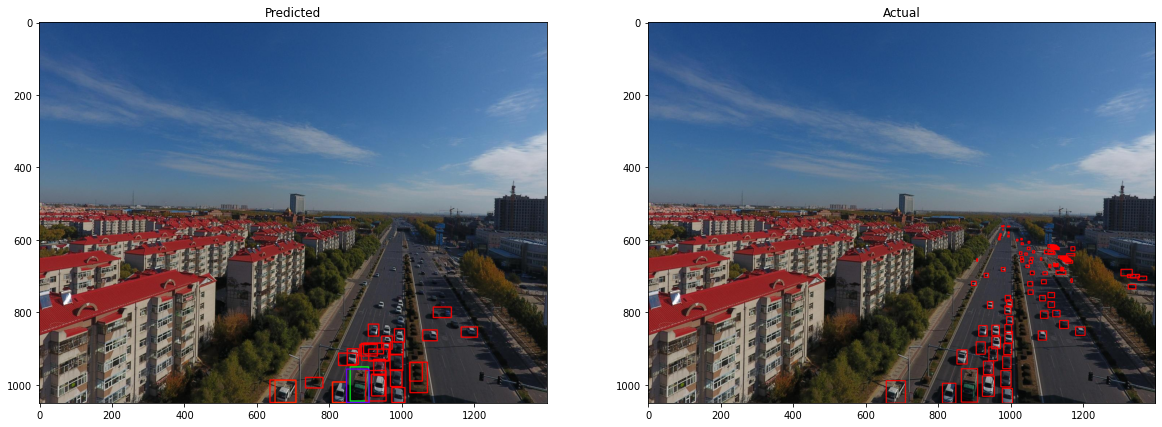

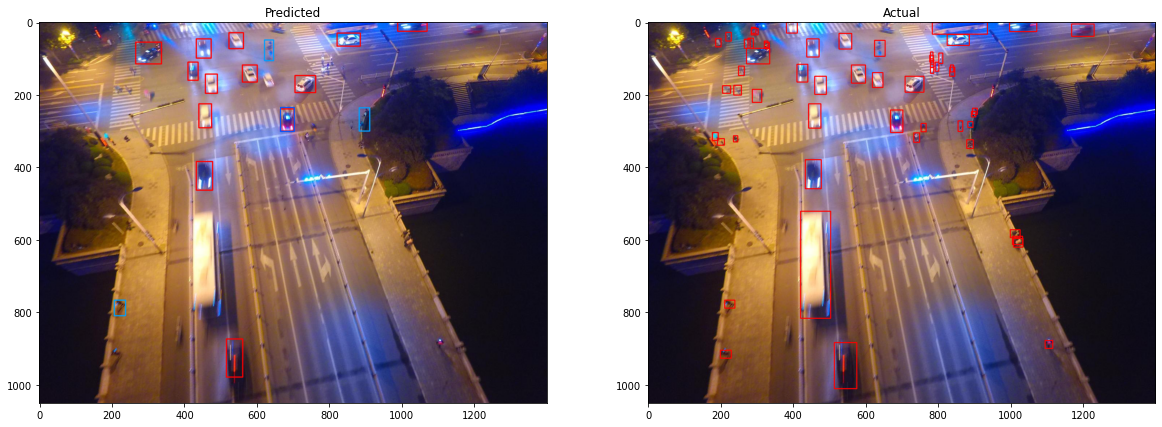

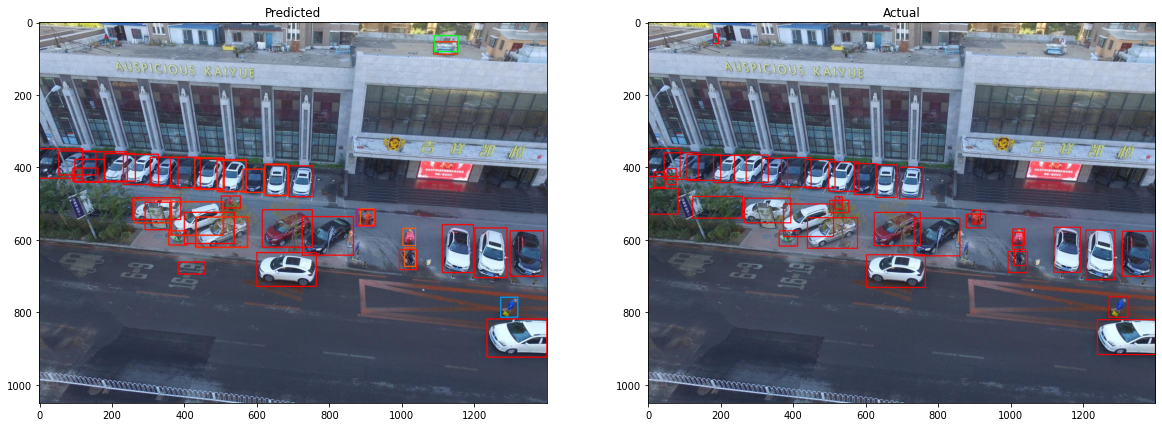

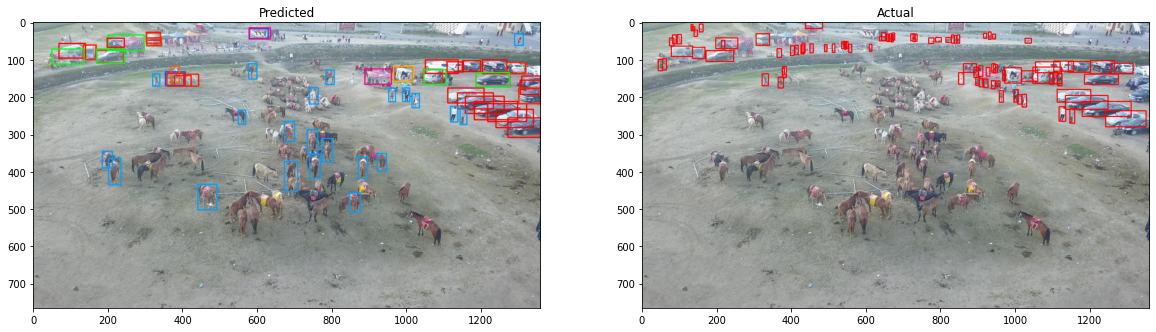

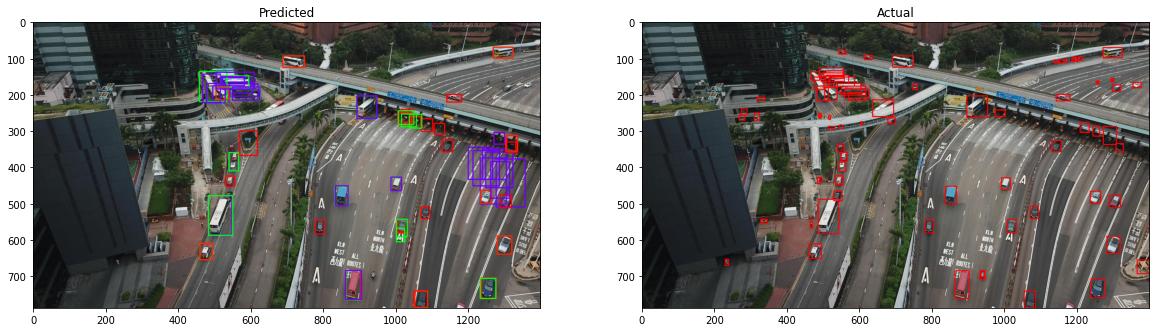

In [ ]:
data=annotation.sample(n=5)  #Predict on Random 5 Image
for i,r in data.iterrows():
    img_inference(r['filename'])

Advantages of RetinaNet for Drone Object Detection:
1. As RetinaNet employs a Feature Pyramid Network, it is able to detect objects at different scales. This is important for drones as they need to detect objects at various heights.
2. RetinaNet also reduces the problem of class imbalance. This is important as cars and people are much more common in the training data.



In [ ]:
def intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


In [ ]:
boxA = [0., 0., 10., 10.]
boxB = [1., 1., 11., 11.]

intersection_over_union(boxA, boxB)

0.680672268907563

In [ ]:
len(annotation['filename'].unique())

6471

In [ ]:
predicted = pd.DataFrame()

,filename,xmin,ymin,xmax,ymax,class
0,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,884,952,968,1042,Car
1,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,175,945,243,1050,Car
2,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,254,889,311,997,Car
3,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,193,852,267,917,Tricycle
4,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,175,803,255,892,Van
...,...,...,...,...,...,...
353542,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,426,83,435,90,Car
353543,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,430,86,439,93,Car
353544,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,434,88,444,96,Car
353545,/content/drive/MyDrive/VisDrone2019-DET/VisDro...,459,57,465,64,Ignore


In [ ]:
MODEL = '/content/drive/MyDrive/RetinaNet/snapshots/resnet50_csv_25.h5'

In [ ]:
--save-path /content/drive/MyDrive/RetinaNet/Evals

In [ ]:
!/content/keras-retinanet/keras_retinanet/bin/evaluate.py --convert-model csv /content/drive/MyDrive/RetinaNet/annotation_val.csv /content/drive/MyDrive/RetinaNet/classes.csv /content/drive/MyDrive/RetinaNet/snapshots/resnet50_csv_25.h5

Loading model, this may take a second...
2022-11-01 03:01:07.553739: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running network: 100% (548 of 548) |######| Elapsed Time: 1:04:31 Time:  1:04:31
Parsing annotations: 100% (548 of 548) |##| Elapsed Time: 0:00:00 Time:  0:00:00
1378 instances of class Ignore with average precision: 0.0035
8844 instances of class Pedestrian with average precision: 0.1801
5125 instances of class People with average precision: 0.0781
1287 instances of class Bicycle with average precision: 0.0233
14064 instances of class Car with average precision: 0.5656
1975 instances of class Van with average precision: 0.1849
750 instances of class Truck with average precision: 0.1120
1045 instances of class Tricycle with average precision: 0.0816
532 instances of class Awning-tricycle with average precision: 0.0401
251 instances of class Bus with average precision: 0.1591
4886 instan

In [ ]:
!/content/keras-retinanet/keras_retinanet/bin/evaluate.py --convert-model --save-path /content/drive/MyDrive/RetinaNet/Evals csv /content/drive/MyDrive/RetinaNet/annotation.csv /content/drive/MyDrive/RetinaNet/classes.csv /content/drive/MyDrive/RetinaNet/snapshots/resnet50_csv_25.h5

Traceback (most recent call last):
  File "/content/keras-retinanet/keras_retinanet/bin/evaluate.py", line 206, in <module>
    main()
  File "/content/keras-retinanet/keras_retinanet/bin/evaluate.py", line 150, in main
    generator = create_generator(args, backbone.preprocess_image)
  File "/content/keras-retinanet/keras_retinanet/bin/evaluate.py", line 74, in create_generator
    **common_args
  File "/content/keras-retinanet/keras_retinanet/bin/../../keras_retinanet/preprocessing/csv_generator.py", line 161, in __init__
    super(CSVGenerator, self).__init__(**kwargs)
  File "/content/keras-retinanet/keras_retinanet/bin/../../keras_retinanet/preprocessing/generator.py", line 89, in __init__
    self.group_images()
  File "/content/keras-retinanet/keras_retinanet/bin/../../keras_retinanet/preprocessing/generator.py", line 291, in group_images
    order.sort(key=lambda x: self.image_aspect_ratio(x))
  File "/content/keras-retinanet/keras_retinanet/bin/../../keras_retinanet/preprocess